# Conectando banco de dados

In [ ]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
import pandas as pd
import os
from dotenv import load_dotenv
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()
pymysql.install_as_MySQLdb()

MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_DB = os.getenv('MYSQL_DB')
MYSQL_USER = os.getenv('MYSQL_USER')
MYSQL_PASSWORD = os.getenv('MYSQL_PASSWORD')

if not all([MYSQL_HOST, MYSQL_DB, MYSQL_USER, MYSQL_PASSWORD]):
    print("Erro: As variáveis de ambiente do MySQL não foram carregadas corretamente.")
    raise ValueError("Credenciais MySQL não configuradas nas variáveis de ambiente.")
else:
    print("Credenciais MySQL carregadas das variáveis de ambiente.")

DATABASE_URI = f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}/{MYSQL_DB}'

engine = None
try:
    print(f"Tentando conectar ao banco de dados")
    engine = create_engine(DATABASE_URI)
    with engine.connect() as connection:
        print(f"\nConexão com o banco de dados '{MYSQL_DB}' estabelecida com sucesso!")

except SQLAlchemyError as e:
    print(f"\nErro ao conectar com o banco de dados: {e}")
    raise

except Exception as e:
    print(f"\nOcorreu um erro inesperado ao criar o motor de conexão: {e}")
    raise

# Total de vendas e lojas que mais venderam

In [2]:
if 'engine' in locals() and engine is not None:
    print("Motor de conexão com o banco de dados MySQL disponível.")

    sql_query_lojas_top10 = """
    SELECT
        va.ID_Loja,
        l.Pais,
        l.Regiao,
        COUNT(va.ID_Venda) AS total_vendas_transacoes,
        SUM(va.Quantidade * va.Preco_Unitario) AS receita_total_loja
    FROM vendas_atualizado va
    JOIN lojas l ON va.ID_Loja = l.ID_Loja
    GROUP BY va.ID_Loja, l.Pais, l.Regiao
    ORDER BY receita_total_loja DESC
    LIMIT 10;
    """

    sql_query_total_vendas = """
    SELECT
        COUNT(ID_Venda) AS total_transacoes,
        SUM(Quantidade * Preco_Unitario) AS receita_total_geral
    FROM vendas_atualizado;
    """

    try:
        print("Executando consulta SQL para Top 10 Lojas:")
        df_lojas_top10 = pd.read_sql_query(sql_query_lojas_top10, engine)

        print("\nTop 10 Lojas por Receita Total:")
        print(df_lojas_top10.to_string(index=False, formatters={'receita_total_loja': '{:,.2f}'.format}))

        print("\nExecutando consulta SQL para Totais Gerais:")
        df_total_vendas = pd.read_sql_query(sql_query_total_vendas, engine)

        total_transacoes = df_total_vendas['total_transacoes'][0]
        receita_total_geral = df_total_vendas['receita_total_geral'][0]

        print(f"Total de Transações: {total_transacoes:,}")
        print(f"Receita Total Geral: {receita_total_geral:,.2f}")

    except SQLAlchemyError as e:
        print(f"Erro ao executar consultas SQL: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado: {e}")
else:
    print("\nErro: O motor de conexão com o banco de dados 'engine' não foi criado. Certifique-se de executar a célula de conexão MySQL.")

Motor de conexão com o banco de dados MySQL disponível.
Executando consulta SQL para Top 10 Lojas:

Top 10 Lojas por Receita Total:
 ID_Loja           Pais Regiao  total_vendas_transacoes receita_total_loja
       1          China Outros                    13857       7,988,263.85
       8         Rússia Outros                    13593       7,933,925.26
       6           Peru Outros                    13702       7,933,890.30
      11       Portugal Outros                    13662       7,916,098.67
      10         Canadá Quebec                    13637       7,887,835.85
      16           Peru Outros                    13633       7,884,594.27
      12         México  Norte                    13584       7,873,234.58
       9 Estados Unidos    Sul                    13587       7,863,662.00
       7           Peru Outros                    13649       7,862,514.37
      14          China Outros                    13596       7,852,494.09

Executando consulta SQL para Totais Gerais

Motor de conexão com o banco de dados MySQL disponível.
Executando consulta SQL para Receita Anual:

Criando gráfico de barras para Receita Anual:


C:\Users\richa\AppData\Local\Temp\ipykernel_9100\1908686801.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_receita_anual['Ano'].astype(str), y='receita_total_anual', data=df_receita_anual, palette='viridis')


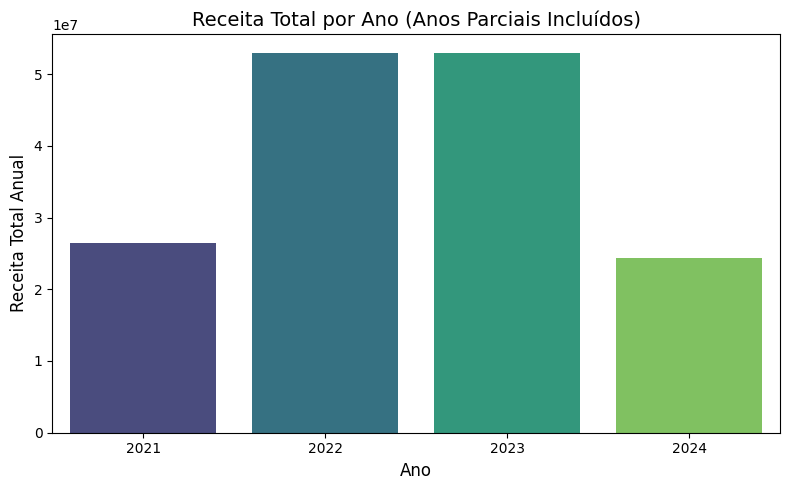

In [3]:
if 'engine' in locals() and engine is not None:
    print("Motor de conexão com o banco de dados MySQL disponível.")

    sql_query_receita_anual = """
    SELECT
        YEAR(Data_Venda) AS Ano,
        SUM(Quantidade * Preco_Unitario) AS receita_total_anual
    FROM vendas_atualizado
    GROUP BY Ano
    ORDER BY Ano;
    """

    print("Executando consulta SQL para Receita Anual:")
    try:
        df_receita_anual = pd.read_sql_query(sql_query_receita_anual, engine)

        print("\nCriando gráfico de barras para Receita Anual:")
        plt.figure(figsize=(8, 5))
        sns.barplot(x=df_receita_anual['Ano'].astype(str), y='receita_total_anual', data=df_receita_anual, palette='viridis')

        plt.title('Receita Total por Ano (Anos Parciais Incluídos)', fontsize=14)
        plt.xlabel('Ano', fontsize=12)
        plt.ylabel('Receita Total Anual', fontsize=12)

        plt.tight_layout()
        plt.show()

    except SQLAlchemyError as e:
        print(f"Erro ao executar a consulta SQL para Receita Anual: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao criar o gráfico de Receita Anual: {e}")
else:
    print("\nErro: O motor de conexão com o banco de dados 'engine' não foi criado.")

## Ranking de produtos mais vendidos

Motor de conexão com o banco de dados MySQL disponível.
Executando consulta SQL para Ranking de Produtos Mais Vendidos:

Criando gráfico de barras para Top 10 Produtos Mais Vendidos (Quantidade)...


C:\Users\richa\AppData\Local\Temp\ipykernel_9100\2058461616.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_quantidade_vendida', y='Nome_Produto', data=df_top10_produtos_qty, palette='viridis', order=df_top10_produtos_qty['Nome_Produto'])


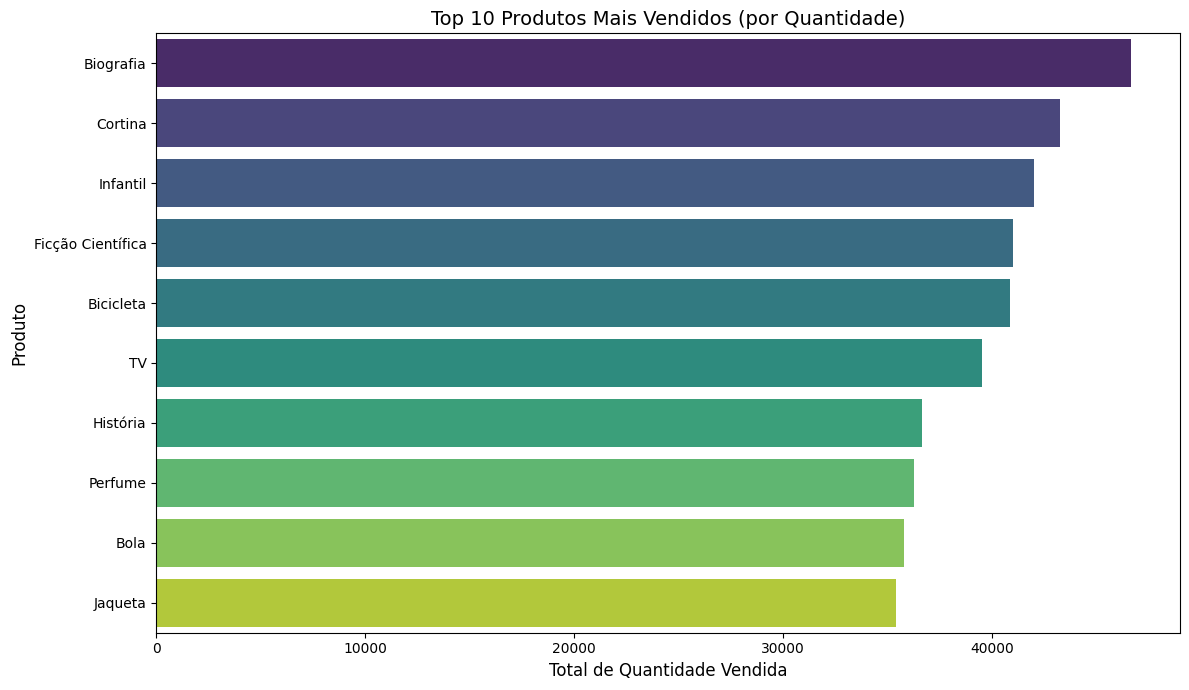

In [4]:
if 'engine' in locals() and engine is not None:
    print("Motor de conexão com o banco de dados MySQL disponível.")

    sql_query_top10_produtos_qty = """
    SELECT
        p.Nome_Produto,
        COUNT(va.ID_Venda) AS total_vendas_transacoes,
        SUM(va.Quantidade) AS total_quantidade_vendida,
        SUM(va.Quantidade * va.Preco_Unitario) AS receita_total
    FROM vendas_atualizado va
    JOIN produtos p ON va.ID_Produto = p.ID_Produto
    GROUP BY p.Nome_Produto
    ORDER BY total_quantidade_vendida DESC
    LIMIT 10;
    """

    print("Executando consulta SQL para Ranking de Produtos Mais Vendidos:")
    try:
        df_top10_produtos_qty = pd.read_sql_query(sql_query_top10_produtos_qty, engine)

        print("\nCriando gráfico de barras para Top 10 Produtos Mais Vendidos (Quantidade)...")
        plt.figure(figsize=(12, 7))
        sns.barplot(x='total_quantidade_vendida', y='Nome_Produto', data=df_top10_produtos_qty, palette='viridis', order=df_top10_produtos_qty['Nome_Produto'])

        plt.title('Top 10 Produtos Mais Vendidos (por Quantidade)', fontsize=14)
        plt.xlabel('Total de Quantidade Vendida', fontsize=12)
        plt.ylabel('Produto', fontsize=12)
        plt.tight_layout()
        plt.show()

    except SQLAlchemyError as e:
        print(f"Erro ao executar a consulta SQL para Top 10 Produtos (Quantidade): {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao criar o gráfico de Top 10 Produtos (Quantidade): {e}")
else:
    print("\nErro: O motor de conexão com o banco de dados 'engine' não foi criado.")

## Categorias mais populares

Motor de conexão com o banco de dados MySQL disponível.
Executando consulta SQL para Receita por Categoria de Produto:

Criando gráfico de barras para Receita por Categoria de Produto...


C:\Users\richa\AppData\Local\Temp\ipykernel_9100\2908219234.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='receita_total_categoria', y='Categoria_Produto', data=df_receita_categoria, palette='viridis', order=df_receita_categoria['Categoria_Produto'])


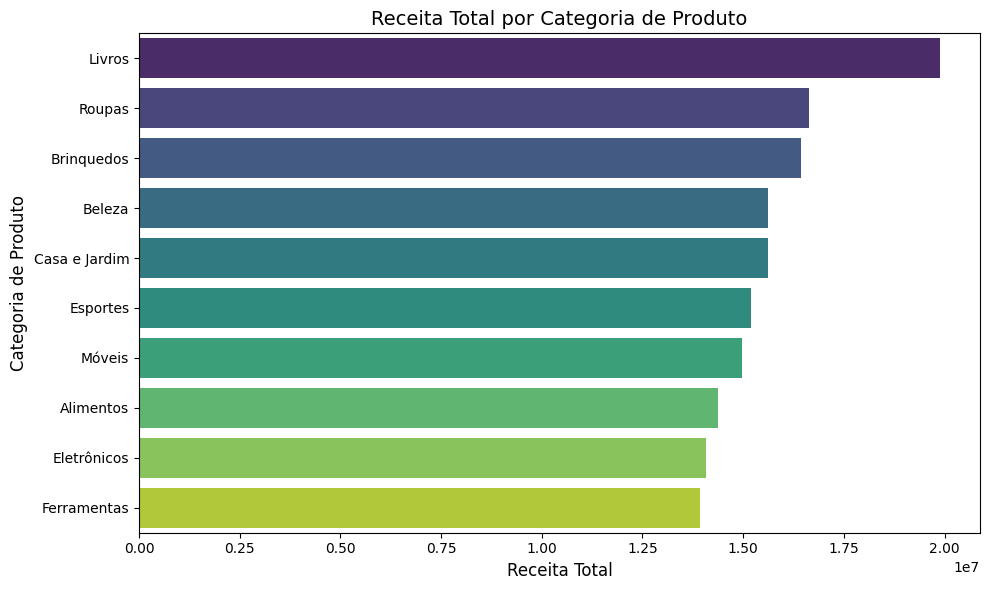

In [5]:
if 'engine' in locals() and engine is not None:
    print("Motor de conexão com o banco de dados MySQL disponível.")

    sql_query_receita_categoria = """
    SELECT
        p.Categoria_Produto,
        COUNT(va.ID_Venda) AS total_vendas_transacoes,
        SUM(va.Quantidade) AS total_quantidade_vendida,
        SUM(va.Quantidade * va.Preco_Unitario) AS receita_total_categoria
    FROM vendas_atualizado va
    JOIN produtos p ON va.ID_Produto = p.ID_Produto
    GROUP BY p.Categoria_Produto
    ORDER BY receita_total_categoria DESC;
    """

    print("Executando consulta SQL para Receita por Categoria de Produto:")
    try:
        df_receita_categoria = pd.read_sql_query(sql_query_receita_categoria, engine)

        print("\nCriando gráfico de barras para Receita por Categoria de Produto...")
        plt.figure(figsize=(10, 6))
        sns.barplot(x='receita_total_categoria', y='Categoria_Produto', data=df_receita_categoria, palette='viridis', order=df_receita_categoria['Categoria_Produto'])

        plt.title('Receita Total por Categoria de Produto', fontsize=14)
        plt.xlabel('Receita Total', fontsize=12)
        plt.ylabel('Categoria de Produto', fontsize=12)
        plt.tight_layout()
        plt.show()

    except SQLAlchemyError as e:
        print(f"Erro ao executar a consulta SQL para Receita por Categoria: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao criar o gráfico de Receita por Categoria: {e}")
else:
    print("\nErro: O motor de conexão com o banco de dados 'engine' não foi criado. Certifique-se de executar a célula de conexão MySQL.")

## Segmentação de clientes

In [6]:
sql_query_rfm_clientes = """
SELECT
    ID_Cliente, -- ID do cliente
    DATEDIFF((SELECT MAX(Data_Venda) FROM vendas_atualizado), MAX(Data_Venda)) AS Recencia_Dias,
    COUNT(ID_Venda) AS Frequencia_Transacoes,
    SUM(Quantidade * Preco_Unitario) AS Valor_Monetario_Total
FROM vendas_atualizado
GROUP BY ID_Cliente
ORDER BY Valor_Monetario_Total DESC
LIMIT 10;
"""

if 'engine' in locals() and engine is not None:
    print("Executando consulta SQL para Métricas RFM dos Clientes:")
    try:
        df_rfm_clientes = pd.read_sql_query(sql_query_rfm_clientes, engine)

        print("\nMétricas RFM para os Top 10 Clientes (por Receita):")
        print(df_rfm_clientes.to_string(index=False, formatters={'Valor_Monetario_Total': '{:,.2f}'.format}))

    except SQLAlchemyError as e:
        print(f"Erro ao executar a consulta SQL para Métricas RFM: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao processar Métricas RFM: {e}")
else:
    print("\nErro: O motor de conexão com o banco de dados 'engine' não foi criado. Certifique-se de executar a célula de conexão MySQL.")

Executando consulta SQL para Métricas RFM dos Clientes:

Métricas RFM para os Top 10 Clientes (por Receita):
 ID_Cliente  Recencia_Dias  Frequencia_Transacoes Valor_Monetario_Total
      78121            183                      6              6,486.14
     108721            376                      5              6,195.40
     131216            185                      5              6,170.52
      90308            352                      6              6,112.16
     225456            246                      5              6,102.98
     149250            412                      5              5,927.72
     254593              5                      5              5,792.91
      97086             50                      4              5,725.95
     188908             91                      4              5,713.12
     211880             56                      6              5,595.35


## Valor médio de compra

In [7]:
sql_query_valor_medio = """
SELECT
    SUM(Quantidade * Preco_Unitario) / COUNT(ID_Venda) AS valor_medio_compra_por_transacao
FROM vendas_atualizado;
"""

if 'engine' in locals() and engine is not None:
    print("Executando consulta SQL para Valor Médio de Compra:")
    try:
        df_valor_medio = pd.read_sql_query(sql_query_valor_medio, engine)

        valor_medio_compra = df_valor_medio['valor_medio_compra_por_transacao'][0]

        print(f"\nValor Médio de Compra por Transação: {valor_medio_compra:,.2f}")

    except SQLAlchemyError as e:
        print(f"Erro ao executar a consulta SQL para Valor Médio de Compra: {e}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado ao processar Valor Médio de Compra: {e}")
else:
    print("\nErro: O motor de conexão com o banco de dados 'engine' não foi criado. Certifique-se de executar a célula de conexão MySQL.")

Executando consulta SQL para Valor Médio de Compra:

Valor Médio de Compra por Transação: 576.73
